In [34]:
%load_ext autoreload
%autoreload 2
%matplotlib ipympl

import matplotlib.pyplot as plt
import numpy as np

from pianoq.lab.dmd import DMD
from pianoq.lab.VimbaCamera import VimbaCamera
from pianoq.lab.lee_holo.generate_lee import make_oam_donut
from pianoq.misc.misc import colorize
from pianoq.misc.mplt import mimshow

from pianoq.lab.lee_holo.lab_helpers import LabMeasure, LabResults


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
# Initialize hardware
cam = VimbaCamera(0)
dmd = DMD()


In [10]:
dmd.other_pos = True
dmd.set_white()

In [ ]:
# Experiment Parameters
GRATING_PERIOD_PX = 8
CARRIER_F = (1 / GRATING_PERIOD_PX, 0)
DUTY_CYCLE = 0.5
FOURIER_CROP_SLICE = np.s_[410:490, 720:800]
EXPOSURE_TIME_MS = 450
BASE_DIR = r'G:\My Drive\Projects\DMD\Alon results\Classical'

In [56]:
# Setup LabMeasure
lab_measure = LabMeasure(
    dmd=dmd,
    cam=cam,
    carrier_f=CARRIER_F,
    duty_cycle=DUTY_CYCLE,
    fourier_crop_slice=FOURIER_CROP_SLICE,
)


In [24]:
cam.close()

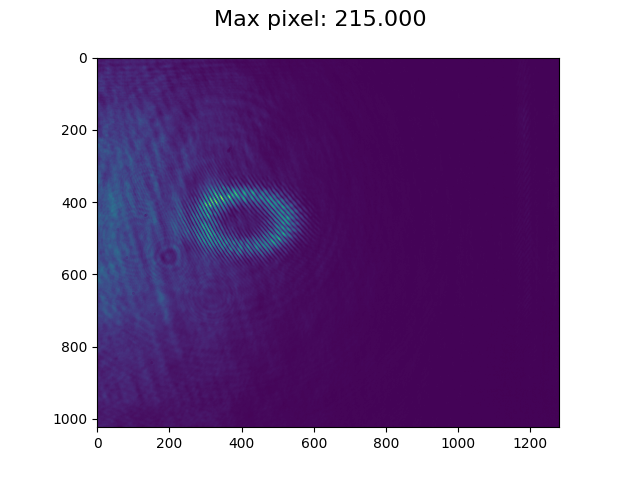

c:\Users\owner\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\animation.py:872: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


In [57]:
# Live View (press 'q' in the plot window to close)
cam.set_exposure_time(EXPOSURE_TIME_MS)
lab_measure.live_view()


In [68]:
# Define Targets and Metadata
targets_to_measure = {}
for ell in [1, 2, 3, 4, 5, 6, 7, 8]:
    name = f"ell_{ell}"
    target = make_oam_donut(Nx=dmd.Nx, Ny=dmd.Ny, ell=ell, r0=0.15, sigma=0.05)
    targets_to_measure[name] = target

experiment_metadata = {
    "exposure_time_ms": EXPOSURE_TIME_MS,
    "notes": "First run with new batch save feature."
}


In [69]:
# # Run Experiment
cam.set_exposure_time(EXPOSURE_TIME_MS)
results = lab_measure.run_experiment(targets_to_measure, experiment_metadata, use_lee_cancellation=False)

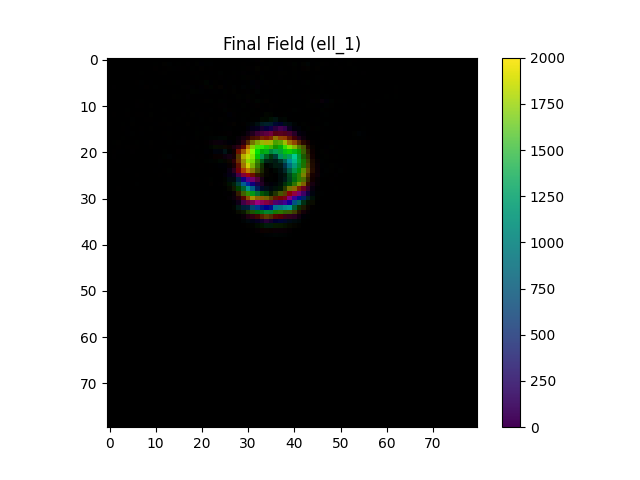

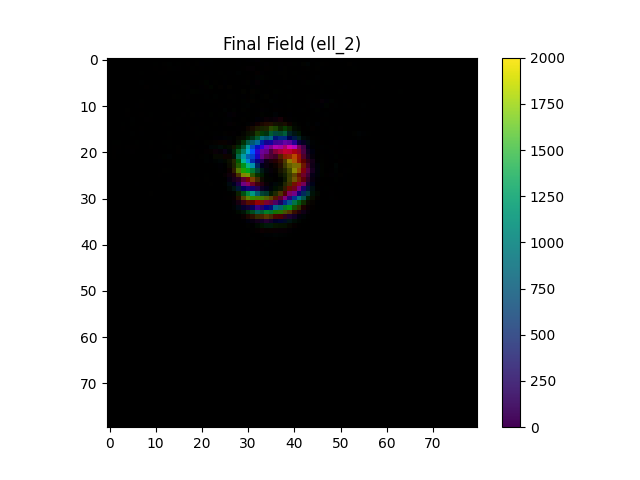

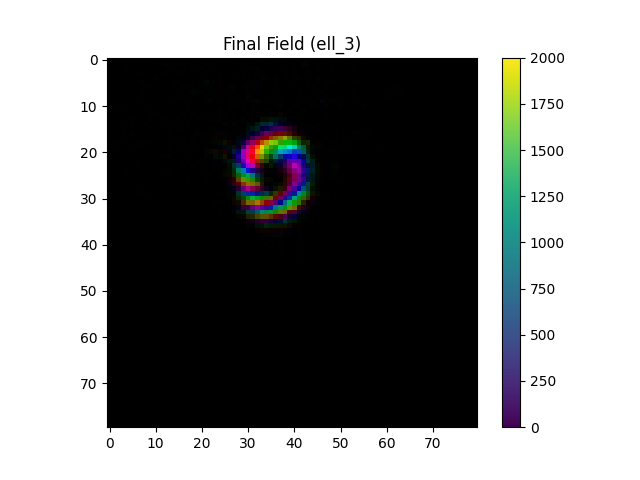

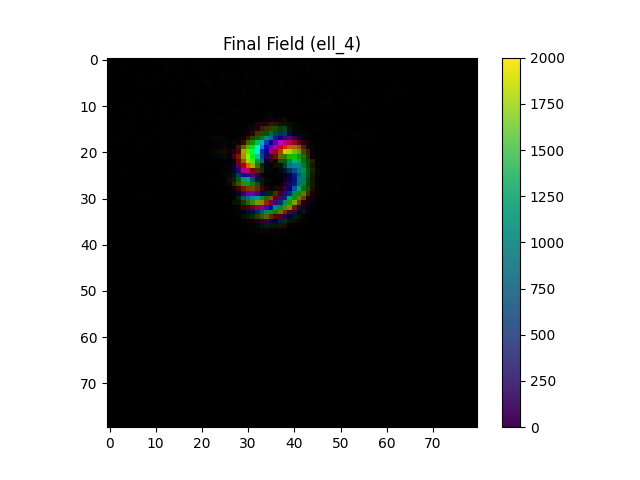

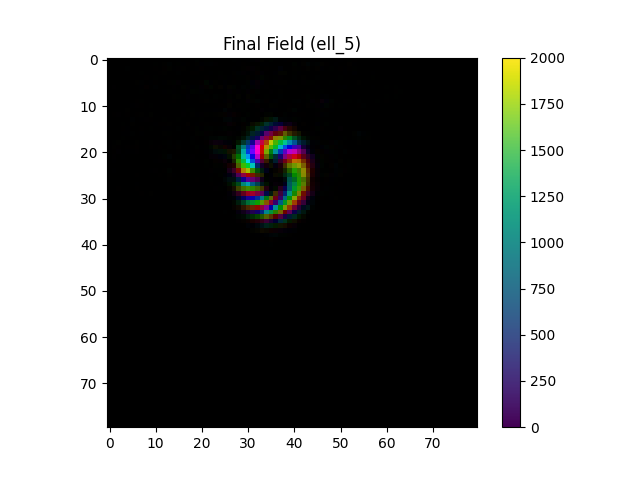

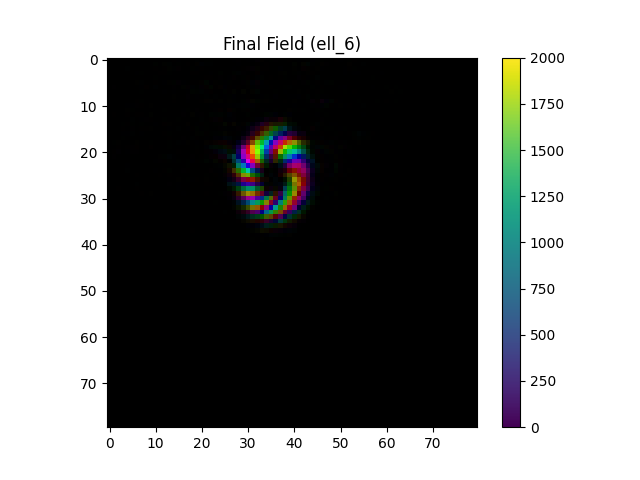

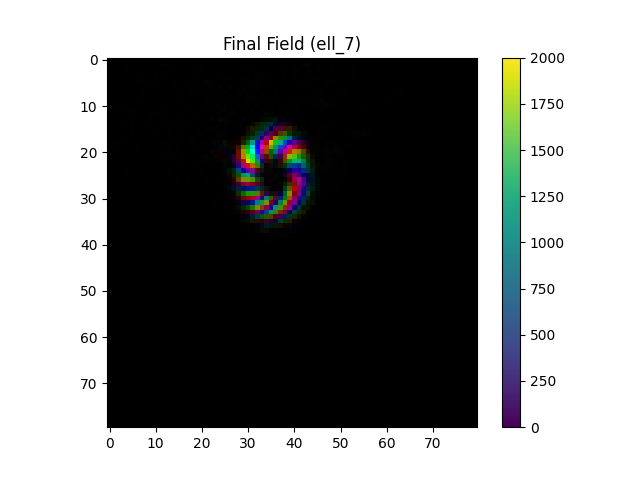

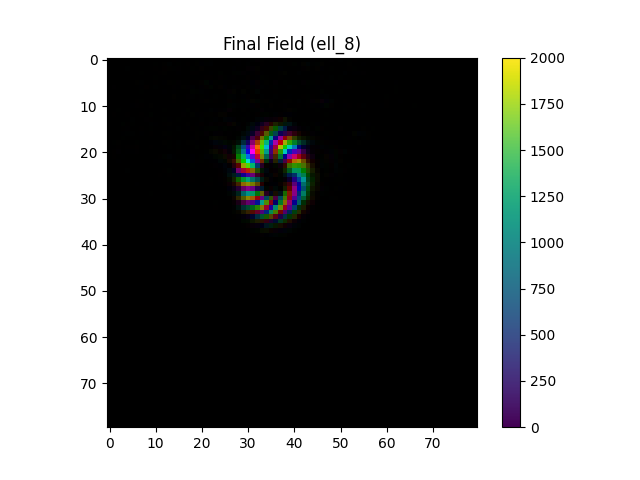

In [70]:
# Visualize Results
for name, result in results.items():
    # corrected_field = result.get_corrected_field()
    # mimshow(colorize(corrected_field), vmax=2000, title=f'Final Field ({name})', figshow=False)
    reconstructed_field = result.get_reconstructed_field(result.camera_image)
    mimshow(colorize(reconstructed_field), vmax=2000, title=f'Final Field ({name})', figshow=False)


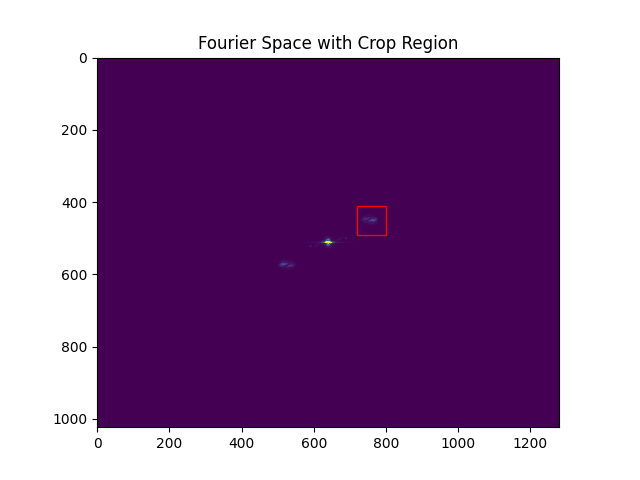

In [71]:
# Debug: View Fourier space for one of the results
results['ell_1'].plot_fourier_space(vmax=0.5e12)


In [72]:
# Save all results to a folder
from datetime import datetime
timestamp = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
lab_measure.save_results(results, f"{BASE_DIR}/{timestamp}")


Saved result to G:\My Drive\Projects\Lee holograms\Results/2025-11-13_10-38-54\ell_1.npz
Saved result to G:\My Drive\Projects\Lee holograms\Results/2025-11-13_10-38-54\ell_2.npz
Saved result to G:\My Drive\Projects\Lee holograms\Results/2025-11-13_10-38-54\ell_3.npz
Saved result to G:\My Drive\Projects\Lee holograms\Results/2025-11-13_10-38-54\ell_4.npz
Saved result to G:\My Drive\Projects\Lee holograms\Results/2025-11-13_10-38-54\ell_5.npz
Saved result to G:\My Drive\Projects\Lee holograms\Results/2025-11-13_10-38-54\ell_6.npz
Saved result to G:\My Drive\Projects\Lee holograms\Results/2025-11-13_10-38-54\ell_7.npz
Saved result to G:\My Drive\Projects\Lee holograms\Results/2025-11-13_10-38-54\ell_8.npz


Loaded metadata: {'timestamp': '2025-11-13T10:38:41.271412', 'name': 'ell_1', 'exposure_time_ms': 450, 'notes': 'First run with new batch save feature.'}


(<Figure size 640x480 with 2 Axes>,
 <Axes: title={'center': 'Loaded field: ell_1'}>)

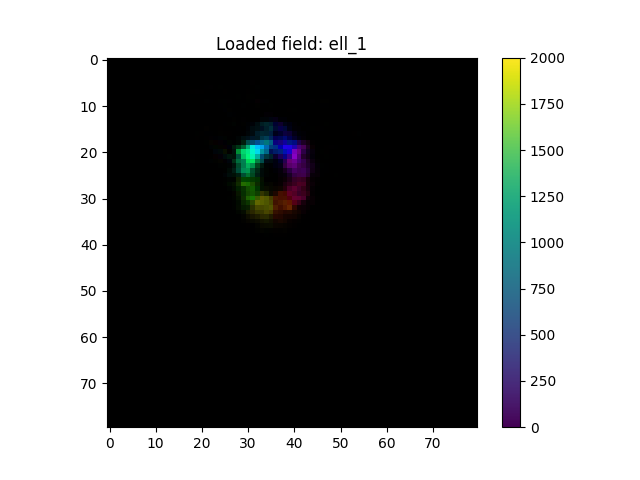

In [80]:
# Load and verify one result
loaded_result = LabResults.load(f"{BASE_DIR}/{timestamp}/ell_1.npz")

# Print its metadata
print("Loaded metadata:", loaded_result.metadata)

# Plot to verify
mimshow(colorize(loaded_result.get_corrected_field()), vmax=2000, title=f"Loaded field: {loaded_result.metadata['name']}", figshow=False)


In [ ]:
# Cleanup
# dmd.close()
# cam.close()
